In [92]:
import numpy as np 
import pandas as pd 
import pylab as plt
import seaborn as sns
import os
import cv2
import warnings
warnings.filterwarnings("ignore")
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test', 'train', 'train.csv', 'labels.csv', 'sample_submission.csv']


**Number of samples**

In [93]:
train_df = pd.read_csv('../input/train.csv')
labels_df = pd.read_csv('../input/labels.csv')
submission_df = pd.read_csv('../input/sample_submission.csv')
print("Train data shape -  rows:",train_df.shape[0]," columns:", train_df.shape[1])
print("Lables shape -      rows:",labels_df.shape[0]," columns:", labels_df.shape[1])
print("submission csv shape -  rows:",submission_df.shape[0]," columns:", submission_df.shape[1])

Train data shape -  rows: 109237  columns: 2
Lables shape -      rows: 1103  columns: 2
submission csv shape -  rows: 7443  columns: 2


训练集共有109237张训练图片，测试集共有7443张训练图片，全部共有1103种标签

Most frequent attributes

In [94]:
attribute_ids=train_df['attribute_ids'].values
attribute_ids

array(['147 616 813', '51 616 734 813', '776', ..., '156 763', '121 433',
       '462 733 813 1020'], dtype=object)

将多标签变为单标签列表

In [95]:
attribute_ids=train_df['attribute_ids'].values
attributes=[]
for attribute_items in [x.split(' ') for x in attribute_ids]:
        for attribute in attribute_items:
            attributes.append(int(attribute))
attributes[0:10]

[147, 616, 813, 51, 616, 734, 813, 776, 51, 671]

id与标签对应

In [96]:
att_df=pd.DataFrame(attributes,columns=['attribute_id'])
att_df=att_df.merge(labels_df)
att_df.head(5)


,attribute_id,attribute_name
0,147,culture::french
1,147,culture::french
2,147,culture::french
3,147,culture::french
4,147,culture::french


In [97]:
frequent=att_df['attribute_name'].value_counts()[:30].to_frame()
frequent

,attribute_name
tag::men,19970
tag::women,14281
culture::french,13522
culture::italian,10375
culture::american,9151
tag::flowers,8419
culture::british,7615
culture::japan,7394
tag::utilitarian objects,6564
culture::egyptian,6542


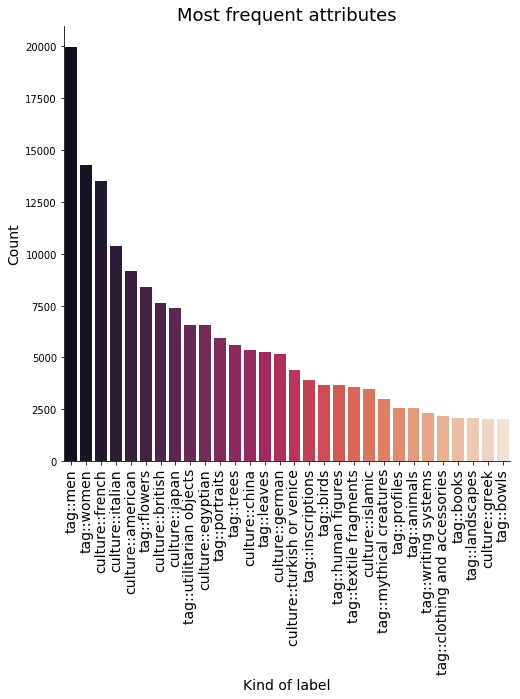

In [98]:
plt.figure(figsize=(8,8))
most=sns.barplot(x=frequent.index,y="attribute_name",data=frequent, palette="rocket")
most.set_xlabel("Kind of label",fontsize=14)
most.set_ylabel("Count",fontsize=14)
sns.despine()
most.set_xticklabels(most.get_xticklabels(), rotation=90,fontsize=14)
plt.title("Most frequent attributes",fontsize=18)
plt.show()

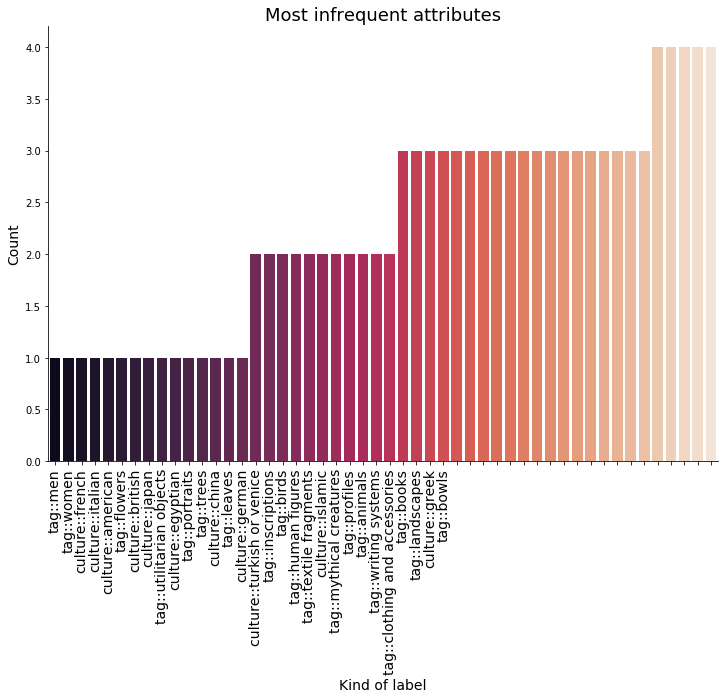

In [99]:
infrequent=att_df['attribute_name'].value_counts(ascending=True)[:50].to_frame()

plt.figure(figsize=(12,8))
inmost=sns.barplot(x=infrequent.index,y="attribute_name",data=infrequent, palette="rocket")
inmost.set_xlabel("Kind of label",fontsize=14)
inmost.set_ylabel("Count",fontsize=14)
sns.despine()
inmost.set_xticklabels(most.get_xticklabels(), rotation=90,fontsize=14)
plt.title("Most infrequent attributes",fontsize=18)
plt.show()

In [100]:
train_df['Number of Tags']=train_df['attribute_ids'].apply(lambda x: len(x.split(' ')))
train_df.head(5)

,id,attribute_ids,Number of Tags
0,1000483014d91860,147 616 813,3
1,1000fe2e667721fe,51 616 734 813,4
2,1001614cb89646ee,776,1
3,10041eb49b297c08,51 671 698 813 1092,5
4,100501c227f8beea,13 404 492 903 1093,5


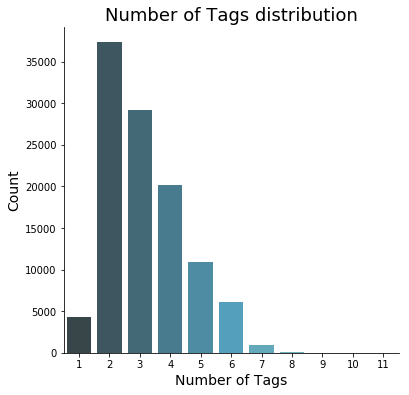

In [101]:
f, ax = plt.subplots(figsize=(6, 6))
ax=sns.countplot(x="Number of Tags",data=train_df,palette="GnBu_d")
ax.set_xlabel("Number of Tags",fontsize=14)
ax.set_ylabel("Count",fontsize=14)
sns.despine()
plt.title("Number of Tags distribution",fontsize=18)
plt.show()


Analysis of picture size

In [102]:
os.listdir("../input/train")[:300]

['e232597c213332cd.png',
 '4c3e9596dafb4d13.png',
 '4712bc2351789604.png',
 'be77f39c438a3448.png',
 '2ffa9ece3a622644.png',
 '9caa967cba20461c.png',
 'a4a099220bcafb7.png',
 '5c6675ae34aa5307.png',
 '371705db8277fa72.png',
 '6c934d937be3d500.png',
 '2f305db4e14e9246.png',
 '635e5a6ef19476c.png',
 '3c741a858038662a.png',
 '427adcd60e9806d6.png',
 'bc27cf7895f091a4.png',
 'ebe7cfe23ef42381.png',
 '7e72aa4da10c88fa.png',
 '6f832ae1dc442271.png',
 '8976e4085e0311ad.png',
 '26dead0af2c91eea.png',
 'd1f06ce6e699be9a.png',
 '40b57b35d555db7.png',
 '2199ed8eb58fca1f.png',
 '7898ef2c82605a92.png',
 '27264becef963ebb.png',
 '5551981a15b8e9af.png',
 '954c8b0f3fef2385.png',
 'cebaa4eb910a49b6.png',
 'e0badcf2041a0859.png',
 '6008ccc1dbb8d761.png',
 'a1d4c91aee8c7062.png',
 'f43f42bd25a10667.png',
 '13ebc5cfca334c15.png',
 '1a87eda029016ca3.png',
 '1c6ad56c157d7993.png',
 'ff054b114999b028.png',
 'e96f60edc02803f1.png',
 'd1ab29aac6fdee4c.png',
 '9b93782c9f3dfd05.png',
 '5806bfd2d402f33b.png',
 'e

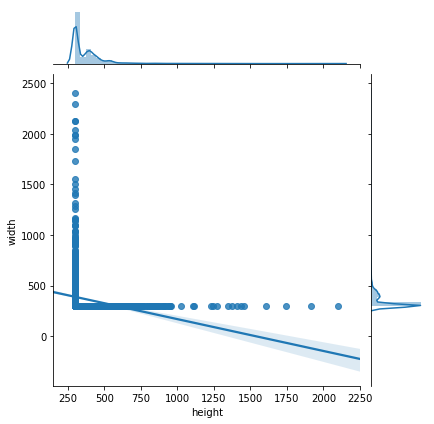

In [103]:
width = []
height = []
for img_name in os.listdir("../input/train/")[-3000:]:
    shape = cv2.imread("../input/train/%s" % img_name).shape
    height.append(shape[0])
    width.append(shape[1])
size = pd.DataFrame({'height':height, 'width':width})
sns.jointplot("height", "width", size, kind='reg')  
plt.show()

In [ ]:
width=[]
height=[]
for img_name in os.listdir("../input/train")[:3000]:
    img = cv2.imread("../input/train/%s" % img_name)
    width.append(img.shape[0])
    height.append(img.shape[1])
print(width[:5])
print(height[:5])

In [118]:
size_df = pd.DataFrame({'width':width,'height':height})

In [119]:
size_df.head(5)

,width,height
0,300,361
1,300,352
2,309,300
3,445,300
4,355,300


In [120]:
print(size_df.count())

width     109237
height    109237
dtype: int64


In [ ]:
sns.lmplot('width','height',size_df, fit_reg=False) 
plt.show()

In [ ]:
print('The average width is '+str(np.mean(size_df.width)))
print('The median width is '+str(np.median(size_df.width)))
print('The average height is '+str(np.mean(size_df.height)))
print('The average height is '+str(np.mean(size_df.height)))

Pictures with most frequents

In [ ]:
most_fre=train_df[train_df['Number of Tags']>9]
least_fre=train_df[train_df['Number of Tags']<2]
most_fre


In [ ]:
count=1
plt.figure(figsize=[30,20])
for img_name in most_fre['id'].values[:6]:
    img = cv2.imread("../input/train/%s.png" % img_name)
    plt.subplot(2, 3, count)
    plt.imshow(img)
    count+=1
plt.show()
    

Pictures with least attributes

In [ ]:
count = 1
plt.figure(figsize=[30,20])
for img_name in least_fre['id'].values[:6]:
    img = cv2.imread("../input/train/%s.png" % img_name)
    plt.subplot(2, 3, count)
    plt.imshow(img)
    count += 1
plt.show

In [ ]:
train_df.head(3)


In [ ]:
labels_df.head(3)

lables是将attribute_id进行编号来对应name

In [ ]:
submission_df.head(3)

In [ ]:
missing = train_df.isnull().sum()
all_val = train_df.count()
print(missing)
print(all_val)
missing_train_df = pd.concat([missing, all_val], axis=1, keys=['Missing', 'All'])
missing_train_df

训练数据中无任何缺失值

In [ ]:
image_names=sorted(os.listdir("../input/train"))
print(image_names[0])
print(image_names[1])
print(image_names[2])
print(image_names[3])

In [ ]:
train_img=cv2.imread("../input/train/1000483014d91860.png")
plt.imshow(train_img)
plt.axis('off')
train_img.shape

其中第一张图片大小300*339 3个颜色通道,下面提取数据。
提图像路径与其对应的标签一一对应且元组化，使用Numpy对其进行序列化。

In [ ]:
train_df

In [ ]:
train_dataset_info = []
for name, labels in zip(train_df['id'],train_df['attribute_ids'].str.split(' ')):
    train_dataset_info.append({
         'path':os.path.join('../input/train', name),
        'labels':np.array([int(label) for label in labels])})
train_dataset_info = np.array(train_dataset_info)
train_dataset_info

In [ ]:

len(train_dataset_info)

In [ ]:
first=train_df['attribute_ids'].str.split(' ')
train_df['first'] = first
train_df.head(10)


记录一下单标签统计方法

In [ ]:
th10 = pd.DataFrame(train_df.attribute_ids.value_counts().head(10))
th10.reset_index(level=0, inplace=True)
th10.columns = ['attribute_ids','count']
th10